In [68]:
import os
import csv
import pandas as pd

match=pd.read_csv("C:/Users/Hiroka/Downloads/sta160/Dataset/csv/2_match_scores/match_scores_1991-2016_UNINDEXED.csv", index_col=False,  names=["tourney_year_id",
"tourney_order",
"tourney_slug",
"tourney_url_suffix",
"tourney_round_name",
"round_order",
"match_order",
"winner_name",
"winner_player_id",
"winner_slug",
"loser_name",
"loser_player_id",
"loser_slug",
"winner_seed",
"loser_seed",
"match_score_tiebreaks",
"winner_sets_won",
"loser_sets_won",
"winner_games_won",
"loser_games_won",
"winner_tiebreaks_won",
"loser_tiebreaks_won",
"match_id",
"match_stats_url_suffix"],header=None)

stats=pd.read_csv("C:/Users/Hiroka/Downloads/sta160/Dataset/csv/3_match_stats/match_stats_1991-2016_UNINDEXED.csv", index_col=False, names=["tourney_order",
"match_id",
"match_stats_url_suffix",
"match_time",
"match_duration",
"winner_aces",
"winner_double_faults",
"winner_first_serves_in",
"winner_first_serves_total",
"winner_first_serve_points_won",
"winner_first_serve_points_total",
"winner_second_serve_points_won",
"winner_second_serve_points_total",
"winner_break_points_saved",
"winner_break_points_serve_total",
"winner_service_points_won",
"winner_service_points_total",
"winner_first_serve_return_won",
"winner_first_serve_return_total",
"winner_second_serve_return_won",
"winner_second_serve_return_total",
"winner_break_points_converted",
"winner_break_points_return_total",
"winner_service_games_played",
"winner_return_games_played",
"winner_return_points_won",
"winner_return_points_total",
"winner_total_points_won",
"winner_total_points_total",
"loser_aces",
"loser_double_faults",
"loser_first_serves_in",
"loser_first_serves_total",
"loser_first_serve_points_won",
"loser_first_serve_points_total",
"loser_second_serve_points_won",
"loser_second_serve_points_total",
"loser_break_points_saved",
"loser_break_points_serve_total",
"loser_service_points_won",
"loser_service_points_total",
"loser_first_serve_return_won",
"loser_first_serve_return_total",
"loser_second_serve_return_won",
"loser_second_serve_return_total",
"loser_break_points_converted",
"loser_break_points_return_total",
"loser_service_games_played",
"loser_return_games_played",
"loser_return_points_won",
"loser_return_points_total",
"loser_total_points_won",
"loser_total_points_total",],header=None)

In [72]:
bigfour_match=match[match["winner_slug"].isin(["novak-djokovic", "rafael-nadal","roger-federer","andy-murray"]) | match["loser_slug"].isin(["novak-djokovic", "rafael-nadal","roger-federer","andy-murray"])]
bigfour_match=bigfour_match[["tourney_round_name","winner_slug","winner_seed","loser_slug","loser_seed","match_id"]]
tourney_round=match.groupby("tourney_round_name")
for key, item in tourney_round:
    print(tourney_round.get_group(key), "\n\n")

      tourney_year_id  tourney_order tourney_slug  \
51183        2007-891              2      chennai   
51184        2007-891              2      chennai   
51185        2007-891              2      chennai   
51186        2007-891              2      chennai   
51187        2007-891              2      chennai   
51188        2007-891              2      chennai   
51189        2007-891              2      chennai   
51190        2007-891              2      chennai   
51191        2007-891              2      chennai   
51192        2007-891              2      chennai   
51193        2007-891              2      chennai   
51194        2007-891              2      chennai   
51195        2007-891              2      chennai   
51196        2007-891              2      chennai   
51197        2007-891              2      chennai   
51198        2007-891              2      chennai   
51242        2007-451              3         doha   
51243        2007-451              3         d

      tourney_year_id  tourney_order     tourney_slug  \
3           1991-7308              1         adelaide   
4           1991-7308              1         adelaide   
5           1991-7308              1         adelaide   
6           1991-7308              1         adelaide   
34           1991-354              2       wellington   
35           1991-354              2       wellington   
36           1991-354              2       wellington   
37           1991-354              2       wellington   
65           1991-301              3         auckland   
66           1991-301              3         auckland   
67           1991-301              3         auckland   
68           1991-301              3         auckland   
96           1991-338              4           sydney   
97           1991-338              4           sydney   
98           1991-338              4           sydney   
99           1991-338              4           sydney   
127          1991-580          

[14624 rows x 24 columns] 


      tourney_year_id  tourney_order tourney_slug  \
15          1991-7308              1     adelaide   
16          1991-7308              1     adelaide   
17          1991-7308              1     adelaide   
18          1991-7308              1     adelaide   
19          1991-7308              1     adelaide   
20          1991-7308              1     adelaide   
21          1991-7308              1     adelaide   
22          1991-7308              1     adelaide   
23          1991-7308              1     adelaide   
24          1991-7308              1     adelaide   
25          1991-7308              1     adelaide   
26          1991-7308              1     adelaide   
27          1991-7308              1     adelaide   
28          1991-7308              1     adelaide   
29          1991-7308              1     adelaide   
30          1991-7308              1     adelaide   
46           1991-354              2   wellington   
47           1991

[3720 rows x 24 columns] 




In [40]:
stats=stats.drop(columns=["tourney_order","match_stats_url_suffix"])

In [71]:
matchstats = match.merge(stats, left_on='match_id', right_on='match_id')
pd.options.display.max_columns = None
matchstats[(matchstats["tourney_round_name"]=="Semi-Finals") & (matchstats["tourney_slug"]=="us-open") & (matchstats["winner_name"]=="Novak Djokovic")]

,tourney_year_id,tourney_order_x,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,loser_name,loser_player_id,loser_slug,winner_seed,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix_x,tourney_order_y,match_stats_url_suffix_y,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
52107,2007-560,52,us-open,/en/scores/archive/us-open/560/2007/results,Semi-Finals,2,2,Novak Djokovic,d643,novak-djokovic,David Ferrer,f401,david-ferrer,3,15,64 64 63,3,0,18,11,0,0,2007-560-d643-f401,/en/scores/2007/560/MS003/match-stats,51,/en/scores/2007/560/MS003/match-stats,02:12:00,132.0,9.0,3.0,60.0,91.0,41.0,60.0,19.0,31.0,1.0,3.0,60.0,91.0,28.0,71.0,16.0,26.0,6.0,11.0,14.0,15.0,44.0,97.0,104.0,188.0,5.0,1.0,71.0,97.0,43.0,71.0,10.0,26.0,5.0,11.0,53.0,97.0,19.0,60.0,12.0,31.0,2.0,3.0,15.0,14.0,31.0,91.0,84.0,188.0
65013,2010-560,50,us-open,/en/scores/archive/us-open/560/2010/results,Semi-Finals,2,2,Novak Djokovic,d643,novak-djokovic,Roger Federer,f324,roger-federer,3,2,57 61 57 62 75,3,2,29,22,0,0,2010-560-d643-f324,/en/scores/2010/560/MS003/match-stats,48,/en/scores/2010/560/MS003/match-stats,03:44:00,224.0,4.0,3.0,94.0,151.0,64.0,94.0,36.0,57.0,4.0,7.0,100.0,151.0,22.0,84.0,41.0,76.0,6.0,12.0,26.0,25.0,63.0,160.0,163.0,311.0,12.0,5.0,84.0,160.0,62.0,84.0,35.0,76.0,6.0,12.0,97.0,160.0,30.0,94.0,21.0,57.0,3.0,7.0,25.0,26.0,51.0,151.0,148.0,311.0
69457,2011-560,51,us-open,/en/scores/archive/us-open/560/2011/results,Semi-Finals,2,1,Novak Djokovic,d643,novak-djokovic,Roger Federer,f324,roger-federer,1,3,67(7) 46 63 62 75,3,2,29,23,0,1,2011-560-d643-f324,/en/scores/2011/560/MS002/match-stats,49,/en/scores/2011/560/MS002/match-stats,03:51:00,231.0,8.0,6.0,82.0,140.0,68.0,82.0,32.0,58.0,2.0,5.0,100.0,140.0,33.0,101.0,28.0,63.0,6.0,12.0,26.0,25.0,61.0,164.0,161.0,304.0,11.0,4.0,101.0,164.0,68.0,101.0,35.0,63.0,6.0,12.0,103.0,164.0,14.0,82.0,26.0,58.0,3.0,5.0,25.0,26.0,40.0,140.0,143.0,304.0
73955,2012-560,53,us-open,/en/scores/archive/us-open/560/2012/results,Semi-Finals,2,1,Novak Djokovic,d643,novak-djokovic,David Ferrer,f401,david-ferrer,2,4,26 61 64 62,3,1,20,13,0,0,2012-560-d643-f401,/en/scores/2012/560/MS003/match-stats,51,/en/scores/2012/560/MS003/match-stats,02:32:00,152.0,7.0,1.0,60.0,101.0,43.0,60.0,24.0,41.0,4.0,7.0,67.0,101.0,20.0,55.0,20.0,37.0,6.0,9.0,17.0,16.0,40.0,92.0,107.0,193.0,2.0,3.0,55.0,92.0,35.0,55.0,17.0,37.0,3.0,9.0,52.0,92.0,17.0,60.0,17.0,41.0,3.0,7.0,16.0,17.0,34.0,101.0,86.0,193.0
78367,2013-560,51,us-open,/en/scores/archive/us-open/560/2013/results,Semi-Finals,2,1,Novak Djokovic,d643,no

In [74]:
bigfour_matchstats["tourney_round_name"].unique()

array(['Round of 32', 'Quarter-Finals', 'Round of 16', 'Round of 128',
       'Round of 64', 'Semi-Finals', 'Finals', 'Round Robin',
       'Olympic Bronze'], dtype=object)

In [79]:
#All matchstats for big 4 players
bigfour_matchstats=matchstats[matchstats["winner_slug"].isin(["novak-djokovic", "rafael-nadal","roger-federer","andy-murray"]) | matchstats["loser_slug"].isin(["novak-djokovic", "rafael-nadal","roger-federer","andy-murray"])]

In [80]:
big4head_match=bigfour_matchstats[bigfour_matchstats["winner_slug"].isin(["novak-djokovic", "rafael-nadal","roger-federer","andy-murray"]) & bigfour_matchstats["loser_slug"].isin(["novak-djokovic", "rafael-nadal","roger-federer","andy-murray"])]
big4head_match

,tourney_year_id,tourney_order_x,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,loser_name,loser_player_id,loser_slug,winner_seed,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix_x,tourney_order_y,match_stats_url_suffix_y,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
41446,2004-403,19,miami,/en/scores/archive/miami/403/2004/results,Round of 32,5,1,Rafael Nadal,n409,rafael-nadal,Roger Federer,f324,roger-federer,32,1,63 63,2,0,12,6,0,0,2004-403-n409-f324,/en/scores/2004/403/MS016/match-stats,18,/en/scores/2004/403/MS016/match-stats,01:10:00,70.0,1.0,2.0,39.0,48.0,31.0,39.0,5.0,9.0,0.0,0.0,36.0,48.0,13.0,34.0,9.0,22.0,3.0,7.0,9.0,9.0,22.0,56.0,58.0,104.0,8.0,2.0,34.0,56.0,21.0,34.0,13.0,22.0,4.0,7.0,34.0,56.0,8.0,39.0,4.0,9.0,0.0,0.0,9.0,9.0,12.0,48.0,46.0,104.0
44308,2005-403,20,miami,/en/scores/archive/miami/403/2005/results,Finals,1,1,Roger Federer,f324,roger-federer,Rafael Nadal,n409,rafael-nadal,1,29,26 67(4) 76(5) 63 61,3,2,27,23,1,1,2005-403-f324-n409,/en/scores/2005/403/MS001/match-stats,19,/en/scores/2005/403/MS001/match-stats,03:43:00,223.0,9.0,9.0,90.0,151.0,67.0,90.0,30.0,61.0,4.0,9.0,97.0,151.0,36.0,100.0,24.0,56.0,7.0,13.0,24.0,24.0,60.0,156.0,157.0,307.0,4.0,4.0,100.0,156.0,64.0,100.0,32.0,56.0,6.0,13.0,96.0,156.0,23.0,90.0,31.0,61.0,5.0,9.0,24.0,24.0,54.0,151.0,150.0,307.0
44830,2005-520,32,roland-garros,/en/scores/archive/roland-garros/520/2005/results,Semi-Finals,2,1,Rafael Nadal,n409,rafael-nadal,Roger Federer,f324,roger-federer,4,1,63 46 64 63,3,1,22,16,0,0,2005-520-n409-f324,/en/scores/2005/520/MS002/match-stats,31,/en/scores/2005/520/MS002/match-stats,02:47:00,167.0,2.0,4.0,88.0,120.0,54.0,88.0,16.0,32.0,6.0,12.0,70.0,120.0,27.0,74.0,28.0,45.0,9.0,13.0,19.0,19.0,55.0,119.0,125.0,239.0,3.0,5.0,74.0,119.0,47.0,74.0,17.0,45.0,4.0,13.0,64.0,119.0,34.0,88.0,16.0,32.0,6.0,12.0,19.0,19.0,50.0,120.0,114.0,239.0
45994,2005-1720,55,bangkok,/en/scores/archive/bangkok/1720/2005/results,Finals,1,1,Roger Federer,f324,roger-federer,Andy Murray,mc10,andy-murray,1,WC,63 75,2,0,13,8,0,0,2005-1720-f324-mc10,/en/scores/2005/1720/MS001/match-stats,54,/en/scores/2005/1720/MS001/match-stats,01:26:00,86.0,2.0,2.0,36.0,67.0,26.0,36.0,21.0,31.0,2.0,3.0,47.0,67.0,10.0,34.0,21.0,41.0,3.0,9.0,11.0,10.0,31.0,75.0,78.0,142.0,6.0,3.0,34.0,75.0,24.0,34.0,20.0,41.0,6.0,9.0,44.0,75.0,10.0,36.0,10.0,31.0,1.0,3.0,10.0,11.0,20.0,67.0,64.0,142.0
47033,2006-495,17,dubai,/en/scores/archive/dubai/495/2006/results,Finals,1,1,Rafael Nadal,n409,rafael-nadal,Roger Federer,f324,roger-federer,2,1,26 64 64,

In [98]:
import numpy as np

In [101]:
big4head_match["winner_A%"]=big4head_match["winner_aces"]/big4head_match["winner_first_serves_total"]
big4head_match["winner_DF%"]=big4head_match["winner_double_faults"]/big4head_match["winner_first_serves_total"]
big4head_match["winner_1SI"]=big4head_match["winner_first_serves_in"]/big4head_match["winner_first_serves_total"]
big4head_match["winner_1st%"]=big4head_match["winner_first_serve_points_won"]/big4head_match["winner_first_serve_points_total"]
big4head_match["winner_2nd%"]=big4head_match["winner_second_serve_points_won"]/big4head_match["winner_second_serve_points_total"]
big4head_match["winner_BP_saved"]=big4head_match["winner_break_points_saved"]/big4head_match["winner_break_points_serve_total"]
big4head_match["winner_rpw%"]=(big4head_match["winner_first_serve_return_won"]+big4head_match["winner_second_serve_return_won"])/(big4head_match["winner_first_serve_return_total"]+big4head_match["winner_second_serve_return_total"])
big4head_match["loser_A%"]=big4head_match["loser_aces"]/big4head_match["loser_first_serves_total"]
big4head_match["loser_DF%"]=big4head_match["loser_double_faults"]/big4head_match["loser_first_serves_total"]
big4head_match["loser_1SI"]=big4head_match["loser_first_serves_in"]/big4head_match["loser_first_serves_total"]
big4head_match["loser_1st%"]=big4head_match["loser_first_serve_points_won"]/big4head_match["loser_first_serve_points_total"]
big4head_match["loser_2nd%"]=big4head_match["loser_second_serve_points_won"]/big4head_match["loser_second_serve_points_total"]
big4head_match["loser_BP_saved"]=big4head_match["loser_break_points_saved"]/big4head_match["loser_break_points_serve_total"]
big4head_match["loser_rpw%"]=(big4head_match["loser_first_serve_return_won"]+big4head_match["loser_second_serve_return_won"])/(big4head_match["loser_first_serve_return_total"]+big4head_match["loser_second_serve_return_total"])
big4head_match["pair"] = np.where(big4head_match["winner_slug"]>big4head_match["loser_slug"],big4head_match["winner_slug"]+'-'+big4head_match["loser_slug"],big4head_match["loser_slug"]+'-'+big4head_match["winner_slug"])
big4head_match

C:\Users\Hiroka\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hiroka\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hiroka\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,tourney_year_id,tourney_order_x,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,loser_name,loser_player_id,loser_slug,winner_seed,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix_x,tourney_order_y,match_stats_url_suffix_y,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,winner_A%,winner_DF%,winner_1SI,winner_1st%,winner_2nd%,winner_BP_saved,winner_rpw%,loser_A%,loser_DF%,loser_1SI,loser_1st%,loser_2nd%,loser_BP_saved,loser_rpw%,pair
41446,2004-403,19,miami,/en/scores/archive/miami/403/2004/results,Round of 32,5,1,Rafael Nadal,n409,rafael-nadal,Roger Federer,f324,roger-federer,32,1,63 63,2,0,12,6,0,0,2004-403-n409-f324,/en/scores/2004/403/MS016/match-stats,18,/en/scores/2004/403/MS016/match-stats,01:10:00,70.0,1.0,2.0,39.0,48.0,31.0,39.0,5.0,9.0,0.0,0.0,36.0,48.0,13.0,34.0,9.0,22.0,3.0,7.0,9.0,9.0,22.0,56.0,58.0,104.0,8.0,2.0,34.0,56.0,21.0,34.0,13.0,22.0,4.0,7.0,34.0,56.0,8.0,39.0,4.0,9.0,0.0,0.0,9.0,9.0,12.0,48.0,46.0,104.0,0.020833,0.041667,0.812500,0.794872,0.555556,NaN,0.392857,0.142857,0.035714,0.607143,0.617647,0.590909,0.571429,0.250000,roger-federer-rafael-nadal
44308,2005-403,20,miami,/en/scores/archive/miami/403/2005/results,Finals,1,1,Roger Federer,f324,roger-federer,Rafael Nadal,n409,rafael-nadal,1,29,26 67(4) 76(5) 63 61,3,2,27,23,1,1,2005-403-f324-n409,/en/scores/2005/403/MS001/match-stats,19,/en/scores/2005/403/MS001/match-stats,03:43:00,223.0,9.0,9.0,90.0,151.0,67.0,90.0,30.0,61.0,4.0,9.0,97.0,151.0,36.0,100.0,24.0,56.0,7.0,13.0,24.0,24.0,60.0,156.0,157.0,307.0,4.0,4.0,100.0,156.0,64.0,100.0,32.0,56.0,6.0,13.0,96.0,156.0,23.0,90.0,31.0,61.0,5.0,9.0,24.0,24.0,54.0,151.0,150.0,307.0,0.059603,0.059603,0.596026,0.744444,0.491803,0.444444,0.384615,0.025641,0.025641,0.641026,0.640000,0.571429,0.461538,0.357616,roger-federer-rafael-nadal
44830,2005-520,32,roland-garros,/en/scores/archive/roland-garros/520/2005/results,Semi-Finals,2,1,Rafael Nadal,n409,rafael-nadal,Roger Federer,f324,roger-federer,4,1,63 46 64 63,3,1,22,16,0,0,2005-520-n409-f324,/en/scores/2005/520/MS002/match-stats,31,/en/scores/2005/520/MS002/match-stats,02:47:00,167.0,2.0,4.0,88.0,120.0,54.0,88.0,16.0,32.0,6.0,12.0,70.0,120.0,27.0,74.0,28.0,45.0,9.0,13.0,19.0,19.0,55.0,119.0,125.0,239.0,3.0,5.0,74.0,119.0,47.0,74.0,17.0,45.0,4.0,13.0,64.0,119.0,34.0,88.0,16.0,32.0,6.0,12.0,19.0,19.0,50.0,120.0,114.0,239.0,0.016667,0.033333,0.733333,0.613636,0.500000,0.500000,0.462185,0.025210,0.042017,0.621849,0.635135,0.377778,0.307692,0.416667,roger-federer-rafael-nadal
45994,2005-1720,55,bangkok,/en/scores/archive/ba

In [102]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [211]:
pairs=big4head_match["pair"].unique()
big4head_stats=pd.DataFrame(pairs, columns=["pair"])
big4head_stats["player1_slug"]=[item[0] for item in big4head_stats["pair"].str.rsplit("-", 2)]
big4head_stats["player2_slug"]=[item[-1] for item in big4head_stats["pair"].str.split("-", 2)]
big4head_stats['matches'] = big4head_stats['pair'].map(big4head_match["pair"].value_counts().reset_index().set_index('index')['pair'])
groupbywinner=big4head_match.groupby(['pair','winner_slug']).size().reset_index()
big4head_stats["player1_wins"]=pd.merge(big4head_stats, groupbywinner,  how='left', left_on=['pair','player1_slug'], right_on = ['pair','winner_slug'])[0]
big4head_stats["player2_wins"]=pd.merge(big4head_stats, groupbywinner,  how='left', left_on=['pair','player2_slug'], right_on = ['pair','winner_slug'])[0]
grouped=big4head_match.groupby(['pair','winner_slug']).mean().reset_index()
big4head_stats[]


,pair,player1_slug,player2_slug,matches,player1_wins,player2_wins
0,roger-federer-rafael-nadal,roger-federer,rafael-nadal,34,11,23
1,roger-federer-andy-murray,roger-federer,andy-murray,25,14,11
2,roger-federer-novak-djokovic,roger-federer,novak-djokovic,44,21,23
3,rafael-nadal-novak-djokovic,rafael-nadal,novak-djokovic,48,22,26
4,novak-djokovic-andy-murray,novak-djokovic,andy-murray,35,24,11
5,rafael-nadal-andy-murray,rafael-nadal,andy-murray,24,17,7


In [333]:
grouped=big4head_match.groupby(['pair','winner_slug']).sum().reset_index()
groupedstats=pd.concat([grouped.iloc[:,:2],grouped.iloc[:,61:]], axis=1)
groupedstats0=groupedstats.iloc[::2,:]
groupedstats1=groupedstats.iloc[1::2,:]
groupedstats1=groupedstats1[['pair', 'winner_slug', 'loser_A%', 'loser_DF%', 'loser_1SI', 'loser_1st%', 'loser_2nd%',
       'loser_BP_saved', 'loser_rpw%','winner_A%', 'winner_DF%', 'winner_1SI',
       'winner_1st%', 'winner_2nd%', 'winner_BP_saved', 'winner_rpw%',
       ]]
groupedstats1.columns = ['pair', 'winner_slug','winner_A%', 'winner_DF%', 'winner_1SI',
       'winner_1st%', 'winner_2nd%', 'winner_BP_saved', 'winner_rpw%', 'loser_A%', 'loser_DF%', 'loser_1SI', 'loser_1st%', 'loser_2nd%',
       'loser_BP_saved', 'loser_rpw%'
       ]
df1 = groupedstats0.set_index(['pair'])
df2 = groupedstats1.set_index(['pair'])
new=df1+df2
new=new.iloc[:,1:].reset_index()
big4head_matchstats=pd.merge(big4head_stats, new,  how='left', left_on=['pair'], right_on = ['pair'])
big4head_matchstats.loc[:,"winner_A%":"loser_rpw%"]=big4head_matchstats.loc[:,"winner_A%":"loser_rpw%"].div(big4head_matchstats["matches"], axis=0)
big4head_matchstats.columns=['pair', 'player1_slug','player2_slug','matches','player1_wins','player2_wins','player2_A%', 'player2_DF%', 'player2_1SI',
       'player2_1st%', 'player2_2nd%', 'player2_BP_saved', 'player2_rpw%', 'player1_A%', 'player1_DF%', 'player1_1SI', 'player1_1st%', 'player1_2nd%',
       'player1_BP_saved', 'player1_rpw%'
       ]
big4head_matchstats=big4head_matchstats[['pair', 'player1_slug','player2_slug','matches','player1_wins','player2_wins', 'player1_A%', 'player1_DF%', 'player1_1SI', 'player1_1st%', 'player1_2nd%',
       'player1_BP_saved', 'player1_rpw%','player2_A%', 'player2_DF%', 'player2_1SI',
       'player2_1st%', 'player2_2nd%', 'player2_BP_saved', 'player2_rpw%']]
big4head_matchstats

,pair,player1_slug,player2_slug,matches,player1_wins,player2_wins,player1_A%,player1_DF%,player1_1SI,player1_1st%,player1_2nd%,player1_BP_saved,player1_rpw%,player2_A%,player2_DF%,player2_1SI,player2_1st%,player2_2nd%,player2_BP_saved,player2_rpw%
0,roger-federer-rafael-nadal,roger-federer,rafael-nadal,34,11,23,0.086758,0.018146,0.631073,0.695198,0.491037,0.535436,0.358468,0.019618,0.017768,0.739336,0.670389,0.555476,0.541597,0.381028
1,roger-federer-andy-murray,roger-federer,andy-murray,25,14,11,0.068980,0.020755,0.600292,0.742234,0.530685,0.498440,0.380621,0.090388,0.031716,0.540409,0.711659,0.507137,0.564438,0.340487
2,roger-federer-novak-djokovic,roger-federer,novak-djokovic,44,21,23,0.090211,0.021746,0.608819,0.733070,0.514086,0.569620,0.368481,0.055270,0.032435,0.642653,0.682222,0.542933,0.585328,0.352884
3,rafael-nadal-novak-djokovic,rafael-nadal,novak-djokovic,48,22,26,0.037453,0.020046,0.679344,0.651638,0.504265,0.540386,0.365750,0.061518,0.020230,0.650557,0.687822,0.533463,0.541220,0.397011
4,novak-djokovic-andy-murray,novak-djokovic,andy-murray,35,24,11,0.048740,0.022979,0.630234,0.683074,0.551171,0.578475,0.421566,0.062611,0.036161,0.570525,0.673278,0.441945,0.559845,0.364752
5,rafael-nadal-andy-murray,rafael-nadal,andy-murray,24,17,7,0.029845,0.015308,0.679107,0.680501,0.547473,0.526191,0.407910,0.084987,0.027466,0.556801,0.693666,0.469114,0.549972,0.361000


In [334]:
import matplotlib.pyplot as plt
from math import pi


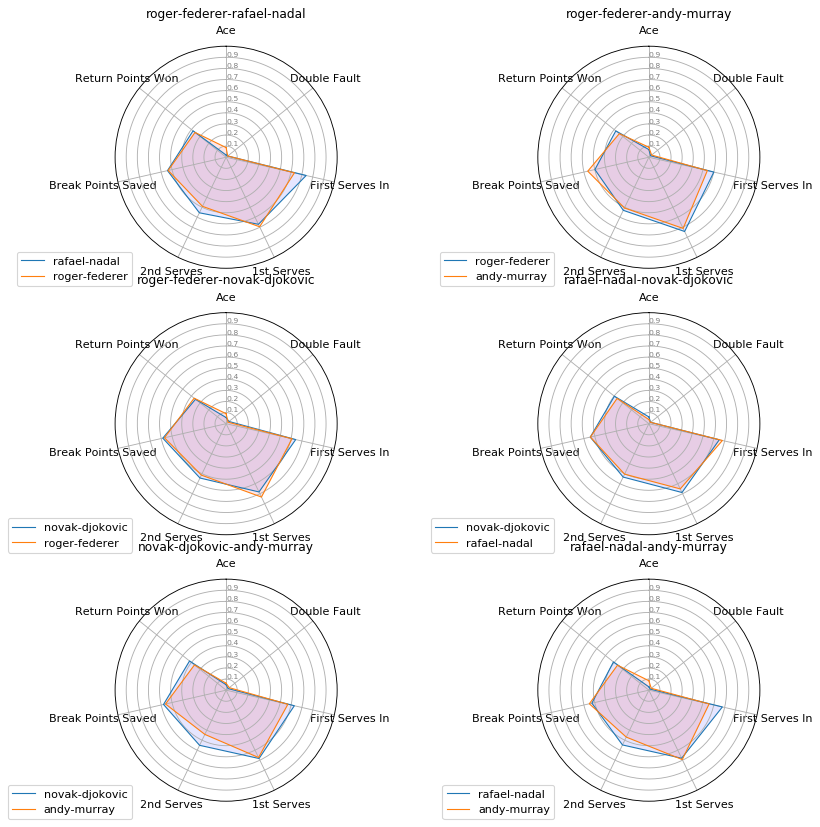

In [361]:
def make_spider(row):
    categories=["Ace","Double Fault","First Serves In", "1st Serves", "2nd Serves", "Break Points Saved", "Return Points Won"]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], color="grey", size=7)
    plt.ylim(0,1)

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    values= big4head_matchstats.iloc[row,6:13].values.flatten().tolist() if big4head_matchstats.iloc[row,4]>big4head_matchstats.iloc[row,5] else big4head_matchstats.iloc[row,13:20].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=big4head_matchstats.iloc[row,1] if big4head_matchstats.iloc[row,4]>big4head_matchstats.iloc[row,5] else big4head_matchstats.iloc[row,2])
    ax.fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values=big4head_matchstats.iloc[row,13:20].values.flatten().tolist() if big4head_matchstats.iloc[row,4]>big4head_matchstats.iloc[row,5] else big4head_matchstats.iloc[row,6:13].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=big4head_matchstats.iloc[row,2] if big4head_matchstats.iloc[row,4]>big4head_matchstats.iloc[row,5] else big4head_matchstats.iloc[row,1])
    ax.fill(angles, values, 'r', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(big4head_matchstats.iloc[row,0], size=11, y=1.1)
    
my_dpi=80
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

 
# Loop to plot
for row in range(0, len(big4head_matchstats.index)):
    make_spider(row=row)


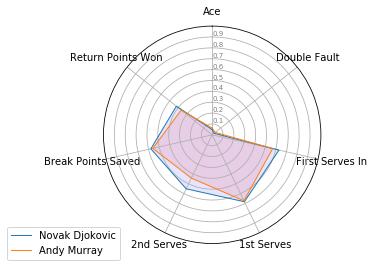

In [351]:
categories=["Ace","Double Fault","First Serves In", "1st Serves", "2nd Serves", "Break Points Saved", "Return Points Won"]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], color="grey", size=7)
plt.ylim(0,1)
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=big4head_matchstats.iloc[4,6:13].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Novak Djokovic")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=big4head_matchstats.iloc[4,13:20].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Andy Murray")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

No handles with labels found to put in legend.


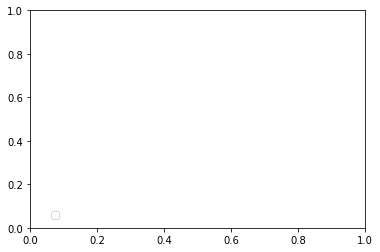

In [348]:

# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=big4head_matchstats.iloc[0,6:13].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=big4head_matchstats.iloc[0,13:20].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [287]:
grouped=big4head_match.groupby(['pair','winner_slug']).sum().reset_index()
grouped

,pair,winner_slug,tourney_order_x,round_order,match_order,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,winner_A%,winner_DF%,winner_1SI,winner_1st%,winner_2nd%,winner_BP_saved,winner_rpw%,loser_A%,loser_DF%,loser_1SI,loser_1st%,loser_2nd%,loser_BP_saved,loser_rpw%
0,novak-djokovic-andy-murray,andy-murray,466,16,13,24,3,160,113,4,0,449,1488.0,53.0,20.0,537.0,896.0,392.0,537.0,180.0,359.0,48.0,73.0,572.0,896.0,208.0,557.0,180.0,334.0,45.0,104.0,136.0,133.0,388.0,891.0,960.0,1787.0,38.0,27.0,557.0,891.0,349.0,557.0,154.0,334.0,59.0,104.0,503.0,891.0,145.0,537.0,179.0,359.0,25.0,73.0,133.0,136.0,324.0,896.0,827.0,1787.0,0.676728,0.230132,6.518518,8.296947,5.379830,6.944689,4.779595,0.456295,0.302751,6.922490,6.892933,5.097894,5.652575,3.812510
1,novak-djokovic-andy-murray,novak-djokovic,779,46,42,56,14,410,264,8,4,746,3546.0,110.0,47.0,1337.0,2112.0,934.0,1337.0,446.0,775.0,98.0,153.0,1380.0,2112.0,446.0,1271.0,538.0,935.0,122.0,272.0,335.0,327.0,984.0,2206.0,2364.0,4318.0,143.0,84.0,1271.0,2206.0,825.0,1271.0,397.0,935.0,150.0,272.0,1222.0,2206.0,403.0,1337.0,329.0,775.0,55.0,153.0,327.0,335.0,732.0,2112.0,1954.0,4318.0,1.249592,0.501530,15.135705,17.014667,14.193082,14.594048,10.942300,1.514647,1.035493,13.449857,15.267775,10.088259,12.649899,7.986722
2,rafael-nadal-andy-murray,andy-murray,231,12,9,16,3,107,65,2,0,222,932.0,70.0,14.0,310.0,546.0,237.0,310.0,128.0,236.0,38.0,50.0,365.0,546.0,156.0,376.0,91.0,177.0,30.0,71.0,87.0,83.0,247.0,553.0,612.0,1099.0,17.0,8.0,376.0,553.0,220.0,376.0,86.0,177.0,41.0,71.0,306.0,553.0,73.0,310.0,108.0,236.0,12.0,50.0,83.0,87.0,181.0,546.0,487.0,1099.0,0.854677,0.187288,3.931253,5.350797,3.965012,5.108059,3.142549,0.194733,0.108725,4.716300,4.124133,3.306397,3.719444,2.292191
3,rafael-nadal-andy-murray,rafael-nadal,619,42,26,41,8,280,187,6,1,595,2503.0,47.0,22.0,998.0,1452.0,709.0,998.0,259.0,454.0,82.0,116.0,968.0,1452.0,276.0,852.0,388.0,685.0,76.0,168.0,232.0,228.0,664.0,1537.0,1632.0,2989.0,118.0,46.0,852.0,1537.0,576.0,852.0,297.0,685.0,92.0,168.0,873.0,1537.0,289.0,998.0,195.0,454.0,34.0,116.0,228.0,232.0,484.0,1452.0,1357.0,2989.0,0.521549,0.258676,11.582272,12.207903,9.832954,8.909135,7.497642,1.185007,0.471903,9.431973,11.297198,7.293732,8.091271,5.521455
4,rafael-nadal-novak-djokovic,novak-djokovic,929,42,30,56,7,377,228,5,2,896,3308.0,123.0,28.0,1183.0,1821.0,858.0,1183.0,383.0,638.0,63.0,104.0,1241.0,1821.0,528.0,1340.0,336.0,617.0,108.0,240.0,306.0,292.0,864.0,1957.0,2105.0,3778.0,67.0,47.0,1340.0,1957.0,812.0,1340.0,281.0,617.0,132.0,240.0,1093.0,1957.0,325.0,1183.0,255.0,638.0,41.0,104.0,292.0,306.0,580.0,1